<a href="https://colab.research.google.com/github/camiladaltro/portfolio/blob/main/CO2_emission_of_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Purpose
Analyze the dataset to know which cars and brands emit more CO2 and which ones emit less

# Import Data
This dataset can be found at: https://www.kaggle.com/datasets/midhundasl/co2-emission-of-cars-dataset

In [42]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Load the data
df = pd.read_csv('/content/drive/MyDrive/DATA.csv')

In [44]:
# Preview
df.head()

,Car,Model,Volume,Weight,CO2,Unnamed: 5
0,Toyota,Aygo,1000,790,99,NaN
1,Mitsubishi,Space Star,1200,1160,95,NaN
2,Skoda,Citigo,1000,929,95,NaN
3,Fiat,500,900,865,90,NaN
4,Mini,Cooper,1500,1140,105,NaN


# Data Cleaning + Preparation

In [45]:
# Drop column Unnamed 5
df = df.drop(['Unnamed: 5'], axis=1)

In [46]:
# Fix the brand name
df.loc[df.Car=='Hundai','Car'] = 'Hyundai'

In [47]:
# Check values
df['Car'].value_counts()

Mercedes      5
Ford          5
Skoda         4
Audi          3
Opel          3
BMW           3
Volvo         3
Hyundai       2
Toyota        1
Mitsubishi    1
Fiat          1
Mini          1
VW            1
Suzuki        1
Honda         1
Mazda         1
Name: Car, dtype: int64

In [48]:
# Concatenate car + model to create variable car_model
df['Car_Model'] = df.Car.astype(str) + ' ' + df.Model.astype(str)

In [49]:
# Check the new column
df['Car_Model'].value_counts().head()

Ford Fiesta         2
Toyota Aygo         1
Audi A6             1
Opel Insignia       1
Mercedes C-Class    1
Name: Car_Model, dtype: int64

In [50]:
# No removal required, volume and CO2 differs
df[df.Car_Model=='Ford Fiesta']

,Car,Model,Volume,Weight,CO2,Car_Model
8,Ford,Fiesta,1500,1112,98,Ford Fiesta
12,Ford,Fiesta,1000,1112,99,Ford Fiesta


In [51]:
# Check if there are null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Car        36 non-null     object
 1   Model      36 non-null     object
 2   Volume     36 non-null     int64 
 3   Weight     36 non-null     int64 
 4   CO2        36 non-null     int64 
 5   Car_Model  36 non-null     object
dtypes: int64(3), object(3)
memory usage: 1.8+ KB


# Data Analysis & Visualization

## Averages values by Brand

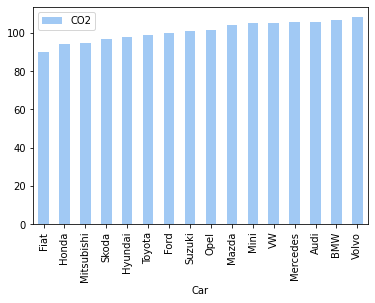

In [52]:
# average CO2 emission by brand
df.groupby('Car').agg(np.mean).sort_values(by='CO2',ascending=True).plot.bar(y='CO2')

* Volvo cars tend to emit more CO2, while Fiat cars have the lowest emission
* Fiat, Honda, Mitsubichi, Skoda and Toyota has values ​​less than 100.

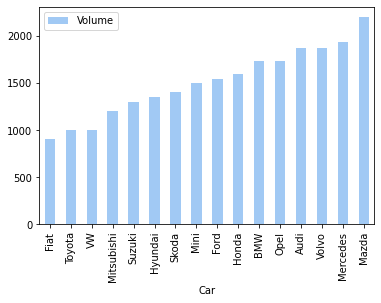

In [53]:
# average volume by brand
df.groupby('Car').agg(np.mean).sort_values(by='Volume',ascending=True).plot.bar(y='Volume')

* The Mazda car has the biggest volume, while Fiat has the lowest
* The Mazda car emits more CO2 than the Fiat cars (which has the lowest CO2 emission value)

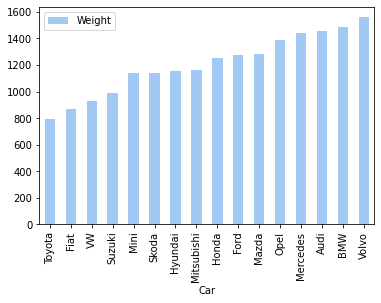

In [54]:
# average weight by brand
df.groupby('Car').agg(np.mean).sort_values(by='Weight',ascending=True).plot.bar(y='Weight')

* Volvo cars are the heaviest, while the Toyota car is the lightest.
* Toyota car emits less CO2 than the Volvo car (which is the biggest emitter)

It is notable that the brands that make the heaviest cars and highest volume tend to emit more CO2

## Highest and lowest CO2 emission by Car Models

In [ ]:
# top 5 car models with high CO2 emission
df.nlargest(5, columns='CO2')

,Car,Model,Volume,Weight,CO2,Car_Model
35,Mercedes,SLK,2500,1395,120,Mercedes SLK
31,Volvo,XC70,2000,1746,117,Volvo XC70
30,Mercedes,E-Class,2100,1605,115,Mercedes E-Class
27,Audi,A6,2000,1725,114,Audi A6
29,BMW,5,2000,1705,114,BMW 5


Note that Mercedes SLK has the highest volume, the highest weight and the highest emission consequently

In [ ]:
# top 5 car models with low CO2 emission
df.nsmallest(5, columns='CO2')

,Car,Model,Volume,Weight,CO2,Car_Model
3,Fiat,500,900,865,90,Fiat 500
6,Skoda,Fabia,1400,1109,90,Skoda Fabia
7,Mercedes,A-Class,1500,1365,92,Mercedes A-Class
13,Honda,Civic,1600,1252,94,Honda Civic
20,Ford,Mondeo,1600,1584,94,Ford Mondeo


Note that Fiat 500 has the lowest volume, the lowest weight and the lowest emission consequently